### Question 1: In this question you are to create some simulated data sets and then use the Adaline neuron and the Sigmoid to perform some prediction. Use whatever programming language you want to use. 

Generate 5000 synthetic data points (x, y) as follows:

-> Using the rnorm() function in R (or equivalent in Matlab or Python or etc), create a vector, x, containing 5000 observations drawn from a Gaussian distribution N(0, 1) [ie, a normal distribution with mean 0 and variance 1]. This vector x represents your set of inputs x.

-> Using the rnorm() function in R (or equivalent in Matlab or Python or etc), create a vector, eps, containing 5000 observation drawn from a N(0, 0.25) distribution; ie, a normal distribution with mean 0 and variance 0.25. 

-> Using vectors x and eps, generate a vector y according to the model 

                y = -1 + 0.5x – 2x2 + 0.3x3 + eps.

-> Your 5000 data-points (x, y) are generated upon completion of this Part-c. Note that the true function is a cubic function with true weight vector being wtrue = (-1, +0.5, -2, +0.3). 

 

-> Implement the Adaline and Sigmoid neuron learning algorithms using (i) batch gradient descent [BGD] and (ii) stochastic gradient descent [SGD]. Using a cross-validation method of your choice (LOOCV or 10-fold-cv), test and compare their regression performances over the synthetic dataset created above. The initializations, the learning rate, the size of test set and training set, and the stopping criterion, and etc are left for you to explore. Think about the reasons why you use a particular strategy. Use your creativity and perform whatever experiments you want to test, and then tell me whatever story your experiments told you.

### Installing and Importing all required packages

In [1]:
#Uncomment below lines to install required packages

# !pip install matplotlib
# !pip install scikit-learn 
# !pip install numpy
# !pip install mlxtend

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

2023-05-29 23:39:42.170746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 23:39:42.358673: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-29 23:39:42.358694: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-29 23:39:43.157748: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Creating dataset

### Explaination: 
In this section, we perform several operations like generating and manipulating vectors using the numpy(np) library.

First, we set the random seed value to 123 so that whenever we run this cell then the random numbers generated will remain the same during every run.

Then we are generating a vector x with the 500 elements. Also, we set values in such a way that it will follow standard normal distribution(mean =0, standard deviation =1).

Furthermore, we create one more vector with name eps with 5000 elements and the vector eps represents random noise with a particular standard deviation(mean =0, standard deviation =0.5(sqrt of 0.25))

Then we calculated a new vector 'y' which is dependent on the vlaues of 'x' and 'y'

Lastly, we reshaped the vector x from 1-D to 2-D array with a single column.

In [3]:
# Create vector x
np.random.seed(123)
x = np.random.normal(0, 1, size=5000)

# Create vector eps
eps = np.random.normal(0, np.sqrt(0.25), size=5000)

# Create vector y
y = -1 + 0.5*x - 2*x**2 + 0.3*x**3 + eps

#Reshape x
x = x.reshape(-1,1)

### Visualizing the data

### Explaination: 
In this section, we are creating a scatter plot using the 'scatter' function of matplotlib library where inputs are x and y, size of markers(s) is 5, transparency marker(alpha) is 0.5 and labels is setting the label for the plotted data points.

plt.xlabel and plt.ylabel sets the x-axis label and y-axis label respectively.

title sets the title of the scatter plot to "Scatter Plot for synthetic Data points"

show displays the scatter plot that can be seen below the cell.

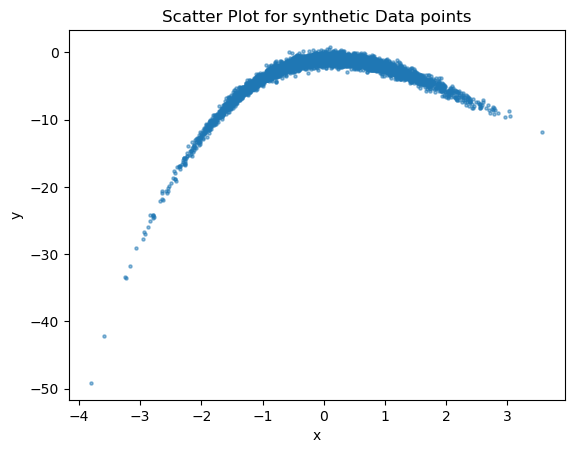

In [4]:
# Scatter plot of the data
plt.scatter(x, y, s=5, alpha=0.5, label='Data Points')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot for synthetic Data points')

# Display the plot
plt.show()

### Implemention of Adaline and Sigmoid neuron learning algorithms using 
### i. Adaline using Batch Gradient Descent [BGD] 

### Explaination:
First in this, the conversion of vector 'x' is done into a Numpy array. Then the reshaping of the array is done while having the same number of elements.

Later, 3 learning rates(0.01,0.001,0.0001) are defined followed by 3 Asaline BGD models are declared with varying learning rates, epochs and other parameters. It will be used to fit the data and predict accordingly.

Then the fit method is used by providing appropriate input data 'X' and the target output 'y'.

Furthermore, predictions('BGD_predict_01','BGD_predict_02','BGD_predict_03' are made on the input data 'X'.

Nextly, for all the predicted models, Mean Sqaured Error(MSE) is calculated.

Then the 10-fold cross validation technique is applied to evaluate the performance of 'Adaline_BGD_01','Adaline_BGD_02','Adaline_BGD_03' models. Also, cross calidation scores are calculated uisng the 'cross_val_score' function by considering the negative mean squared error as the scoring metric. Then the mean squared error is the computed as negative of mean of teh cross validation scores.

To summarize, the code of below cell trains an devaluated the Adaline BGD models with 3 different learning rate using linear regression approach. It performs predictions, MSE on the trainig set, and finally evaluates the models using the 10-fold cross-validation to predict their generalization performance.

In [5]:
# Converting vector x into Matrix for the model fitting
X = np.asanyarray(x).reshape(-1,1)

In [6]:
# Using LR model to implement BGD (BATCH GRADIANT DECENT) in ADALINE NEURAL NETWORK
# Method used = sgd (stochastic gradient descent) with Minibatch = length(Output Variable)) for this, model will 
# learn for entire dataset. It will update the weigth after processing the entire dataset
# ets = Learning Rate
# epochs = cycles for dataset reading

# Learning Rates
lr_01 = 0.01
lr_02 = 0.001
lr_03 = 0.0001

# Adaline BGD 1
Adaline_BGD_01 = LinearRegression(method='sgd', eta=lr_01, epochs=30, random_seed=0, minibatches=len(y))

# Adaline BGD 2
Adaline_BGD_02 = LinearRegression(method='sgd', eta=lr_02, epochs=30, random_seed=0, minibatches=len(y))

# Adaline BGD 3
Adaline_BGD_03 = LinearRegression(method='sgd', eta=lr_03, epochs=30, random_seed=0, minibatches=len(y))

# Training Model 1
Adaline_BGD_01.fit(X, y)

# Training Model 2
Adaline_BGD_02.fit(X, y)

#Training Model 3
Adaline_BGD_03.fit(X, y)

# Finding predictions on each model
# Model 1
BGD_predict_01 = Adaline_BGD_01.predict(X)

# Model 2
BGD_predict_02 = Adaline_BGD_02.predict(X)

# Model 3
BGD_predict_03 = Adaline_BGD_03.predict(X)

# Calculating MSE for each predictions
# Model 1
BGD_mean_square_error_01 = metrics.mean_squared_error(BGD_predict_01, y)

# Model 2
BGD_mean_square_error_02 = metrics.mean_squared_error(BGD_predict_02, y)

# Model 3
BGD_mean_square_error_03 = metrics.mean_squared_error(BGD_predict_03, y)

# Applying 10 Fold Cross Validation for each model
# Model 1
BGD_scores_01 = cross_val_score(Adaline_BGD_01, X, y, cv=10, scoring='neg_mean_squared_error')
BGD_mean_square_error_01 = np.mean(-BGD_scores_01)

# Model 2
BGD_scores_02 = cross_val_score(Adaline_BGD_02, X, y, cv=10, scoring='neg_mean_squared_error')
BGD_mean_square_error_02 = np.mean(-BGD_scores_02)

# Model 3
BGD_scores_03 = cross_val_score(Adaline_BGD_03, X, y, cv=10, scoring='neg_mean_squared_error')
BGD_mean_square_error_03 = np.mean(-BGD_scores_03)


### Printing Results for Batch Gradient Descent

### Explaination:
The below cell prints the results of the Adaline learning algorithm using batch gradient descent for the 3 different models.

First the header is printed then for each model(model 1, model 2, model 3), the below information is printed:

1. Learning rate of the model
2. Intercept of the line (which is also called as weight) learned by the model.
3. Slope of the line(which is also called as bias) learned by the model.
4. Mean square error(MSE) of the model's predictions on the tarining set.
5. Results after applying 10-fold cross validation wrt the corresponding learning rate

The above information provides us with the insights into the performance and evaluation of teh models.

In [7]:
# Printing results
print("Adaline Learning Algorithm using Batch Gradient Descent [BGD] : ")
print("\n")

#Model 1
print("Results for model 1")
print("\tLearning Rate : ", lr_01, end='\n')
print("\tIntercept of the line : ", Adaline_BGD_01.w_, end='\n')
print("\tSlope of the line : ", Adaline_BGD_01.b_, end='\n')
print("\tMean Square Error of Model-01 : ", BGD_mean_square_error_01, end='\n\n')
print("\tResult after applying 10 Fold-Cross Validation : MSE (LR = 0.01) : ", BGD_mean_square_error_01, end='\n')


#Model 2
print("\nResults for model 2")
print("\tLearning Rate : ", lr_02, end='\n')
print("\tIntercept of the line : ", Adaline_BGD_02.w_, end='\n')
print("\tSlope of the line : ", Adaline_BGD_02.b_, end='\n')
print("\tMean Square Error of Model-02 : ", BGD_mean_square_error_02, end='\n\n')
print("\tResult after applying 10 Fold-Cross Validation : MSE (LR = 0.001) : ", BGD_mean_square_error_02, end='\n')

#Model 3
print("\nResults for model 3")
print("\tLearning Rate : ", lr_03, end='\n')
print("\tIntercept of the line : ", Adaline_BGD_03.w_, end='\n')
print("\tSlope of the line : ", Adaline_BGD_03.b_, end='\n')
print("\tMean Square Error of Model-03 : ", BGD_mean_square_error_03, end='\n\n')
print("\tResult after applying 10 Fold-Cross Validation : MSE (LR = 0.0001) : ", BGD_mean_square_error_03, end='\n')


Adaline Learning Algorithm using Batch Gradient Descent [BGD] : 


Results for model 1
	Learning Rate :  0.01
	Intercept of the line :  [[0.83900233]]
	Slope of the line :  [-2.63655937]
	Mean Square Error of Model-01 :  3.4547159991813892e+99

	Result after applying 10 Fold-Cross Validation : MSE (LR = 0.01) :  3.4547159991813892e+99

Results for model 2
	Learning Rate :  0.001
	Intercept of the line :  [[1.33322705]]
	Slope of the line :  [-2.86912113]
	Mean Square Error of Model-02 :  4.3962338993054553e+33

	Result after applying 10 Fold-Cross Validation : MSE (LR = 0.001) :  4.3962338993054553e+33

Results for model 3
	Learning Rate :  0.0001
	Intercept of the line :  [[1.35204284]]
	Slope of the line :  [-2.96089049]
	Mean Square Error of Model-03 :  8.361371616155939

	Result after applying 10 Fold-Cross Validation : MSE (LR = 0.0001) :  8.361371616155939


### Explaination:
The results of the above models can be compared based on their learning rates and mean squared error (MSE) values.

Based on these results, it can be observed that a lower learning rate leads to better performance in terms of minimizing the MSE. However, even with the smallest learning rate used in Model 3, there is still room for improvement as indicated by the remaining MSE. Further analysis and experimentation like increasing the training data set and hyperparameter tuning may be needed to refine the model and achieve better results.

### Plotting Regression Line for each learning rate for BGD
### Explaination:
Below code performs the following steps:
1. The code generates three plots showing the regression lines for different learning rates in the Adaline model with Batch Gradient Descent (BGD) method.
2. Each plot consists of a scatter plot of the data points and a corresponding regression line.
3. The learning rates used for the three models are displayed in the titles of the plots.
4. The x-axis represents the X values, and the y-axis represents the y values.
5. The legend indicates the data points and the regression line.
6. The plots are arranged in a 1x3 grid layout for easy comparison.

The purpose of the plots is to visually illustrate the impact of different learning rates on the regression lines and their fit to the data.

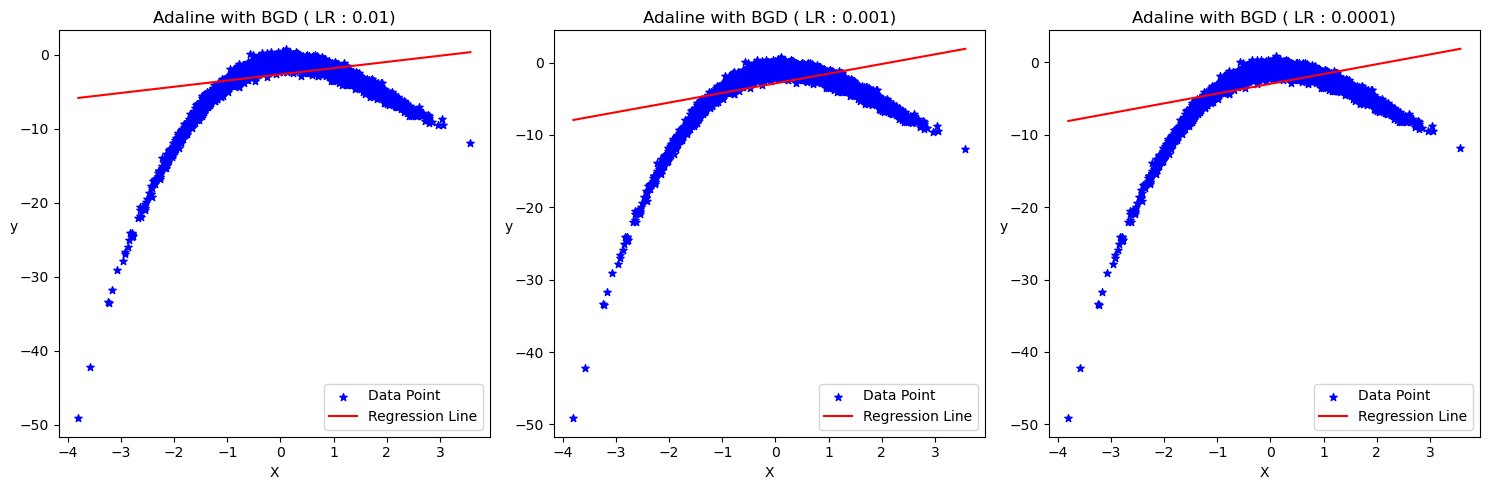

In [8]:
# plot area range for the X vector
xplot_01 = np.linspace (x.min(), x.max(), 5000)
xplot_02 = np.linspace (x.min(), x.max(), 5000)
xplot_03 = np.linspace (x.min(), x.max(), 5000)

# Plotting graph of Regression Line for each Learning Rate for Batch Gradiant Descent method

# Plotting Regression line on the graph side by side
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
ax[0].scatter(X, y, color='blue', label='Data Point', marker="*", s=30)
ax[0].plot(xplot_01, Adaline_BGD_01.predict(xplot_01.reshape(-1, 1)), color='red', label="Regression Line")
ax[0].set_title("Adaline with BGD ( LR : " + str(lr_01) + ")")
ax[0].set_xlabel("X")
ax[0].set_ylabel("y", rotation=0)
ax[0].legend(loc='lower right')

# Plot 2
ax[1].scatter(X, y, color='blue', label='Data Point', marker="*", s=30)
ax[1].plot(xplot_02, Adaline_BGD_02.predict(xplot_02.reshape(-1, 1)), color='red', label="Regression Line")
ax[1].set_title("Adaline with BGD ( LR : " + str(lr_02) + ")")
ax[1].set_xlabel("X")
ax[1].set_ylabel("y", rotation=0)
ax[1].legend(loc='lower right')

# Plot 3
ax[2].scatter(X, y, color='blue', label='Data Point', marker="*", s=30)
ax[2].plot(xplot_03, Adaline_BGD_03.predict(xplot_03.reshape(-1, 1)), color='red', label="Regression Line")
ax[2].set_title("Adaline with BGD ( LR : " + str(lr_03) + ")")
ax[2].set_xlabel("X")
ax[2].set_ylabel("y", rotation=0)
ax[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

### Plotting Learning Curve for each learning rate for BGD
### Explaination: 
Below code perform the following operations:
1. The code generates three plots displaying the learning curves of the Adaline model with Batch Gradient Descent (BGD) for different learning rates. 
2. Each plot represents the relationship between the number of epochs and the logarithm (base 10) of the Mean Squared Error (MSE) cost. 

The purpose is to compare the convergence and performance of the models with varying learning rates. The plots provide insights into how the MSE cost changes over the training process, helping evaluate the effectiveness of different learning rates in training the Adaline model.

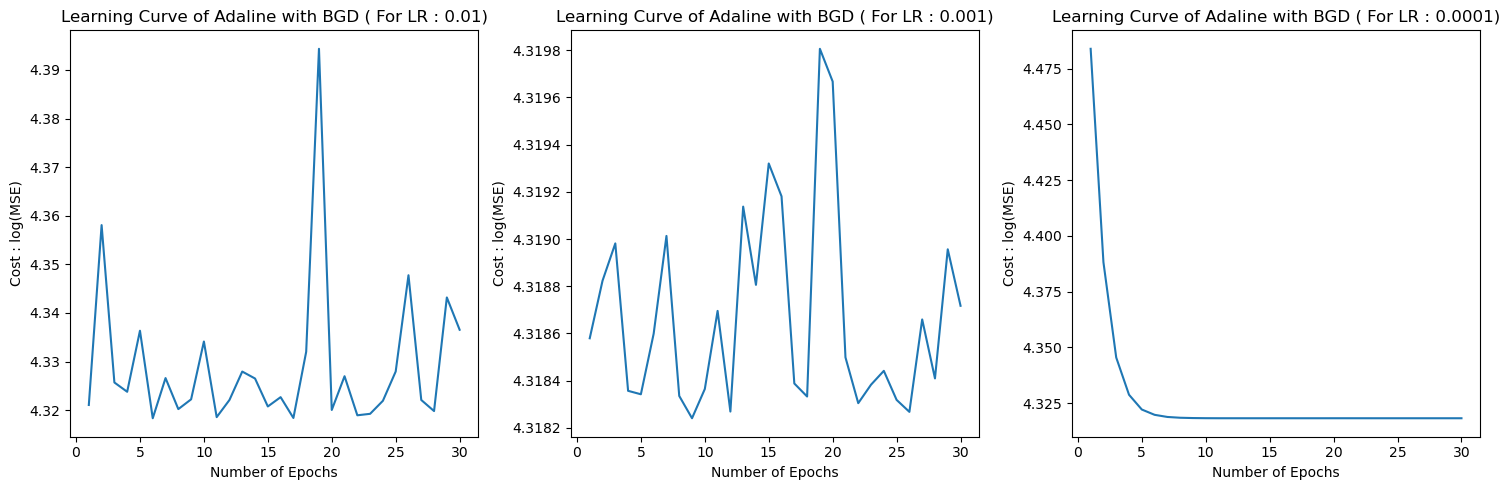

In [9]:
# plot area range for the X vector
xplot_01 = np.linspace (x.min(), x.max(), 5000)
xplot_02 = np.linspace (x.min(), x.max(), 5000)
xplot_03 = np.linspace (x.min(), x.max(), 5000)

# Plotting graph of Learning Curve for each LR for Batch Gradiant Descent method

# Plotting Learning Curve on the graph side by side
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
ax[0].plot(range(1, Adaline_BGD_01.epochs + 1), np.log10(Adaline_BGD_01.cost_))
ax[0].set_title("Learning Curve of Adaline with BGD ( For LR : " + str(lr_01) + ")")
ax[0].set_xlabel("Number of Epochs")
ax[0].set_ylabel("Cost : log(MSE)", rotation=90)

# Plot 2
ax[1].plot(range(1, Adaline_BGD_02.epochs + 1), np.log10(Adaline_BGD_02.cost_))
ax[1].set_title("Learning Curve of Adaline with BGD ( For LR : " + str(lr_02) + ")")
ax[1].set_xlabel("Number of Epochs")
ax[1].set_ylabel("Cost : log(MSE)", rotation=90)

# Plot 3
ax[2].plot(range(1, Adaline_BGD_03.epochs + 1), np.log10(Adaline_BGD_03.cost_))
ax[2].set_title("Learning Curve of Adaline with BGD ( For LR : " + str(lr_03) + ")")
ax[2].set_xlabel("Number of Epochs")
ax[2].set_ylabel("Cost : log(MSE)", rotation=90)

plt.tight_layout()
plt.show()

### ii. Adaline using Stochastic Gradient Descent [SGD]
### Explaination:
Below code cell explains the following steps:

1. The code implements Stochastic Gradient Descent (SGD) in the Adaline neural network using different learning rates. 
2. Three models are trained with different learning rates (0.01, 0.001, 0.0001), and their predictions are calculated. 
3. The Mean Squared Error (MSE) is then computed for each model's predictions. 

Additionally, 10-fold cross-validation is applied to evaluate the performance of each model by calculating the average MSE. The code provides insights into how different learning rates impact the training and performance of the Adaline SGD models.

In [10]:
# Using LR model to implement SGD (Stochastic Gradient Descent) in ADALINE NEURAL NETWORK
# Method used = sgd (stochastic gradient descent) with Minibatch = 1), for this, model will learn for each data 
# points. Model will update weigth after processing each single data points. It is pure Stochastic Gradient Descent.
# ets = Learning Rate
# epochs = cycles for dataset reading

# Learning Rates
lr_01 = 0.01
lr_02 = 0.001
lr_03 = 0.0001

# Adaline SGD 1
Adaline_SGD_01 = LinearRegression(method='sgd', eta=lr_01, epochs=30, random_seed=0, minibatches=1)

# Adaline SGD 2
Adaline_SGD_02 = LinearRegression(method='sgd', eta=lr_02, epochs=30, random_seed=0, minibatches=1)

# Adaline SGD 3
Adaline_SGD_03 = LinearRegression(method='sgd', eta=lr_03, epochs=30, random_seed=0, minibatches=1)

# Training Model 1
Adaline_SGD_01.fit(X, y)

# Training Model 2
Adaline_SGD_02.fit(X, y)

#Training Model 3
Adaline_SGD_03.fit(X, y)

# Finding predictions on each model
# Model 1
SGD_predict_01 = Adaline_SGD_01.predict(X)

# Model 2
SGD_predict_02 = Adaline_SGD_02.predict(X)

# Model 3
SGD_predict_03 = Adaline_SGD_03.predict(X)

# Calculating MSE for each predictions
# Model 1
SGD_mean_square_error_01 = metrics.mean_squared_error(SGD_predict_01, y)

# Model 2
SGD_mean_square_error_02 = metrics.mean_squared_error(SGD_predict_02, y)

# Model 3
SGD_mean_square_error_03 = metrics.mean_squared_error(SGD_predict_03, y)

# Applying 10 Fold Cross Validation for each model
# Model 1
SGD_scores_01 = cross_val_score(Adaline_SGD_01, X, y, cv=10, scoring='neg_mean_squared_error')
SGD_mean_square_error_01 = np.mean(-SGD_scores_01)

# Model 2
SGD_scores_02 = cross_val_score(Adaline_SGD_02, X, y, cv=10, scoring='neg_mean_squared_error')
SGD_mean_square_error_02 = np.mean(-SGD_scores_02)

# Model 3
SGD_scores_03 = cross_val_score(Adaline_SGD_03, X, y, cv=10, scoring='neg_mean_squared_error')
SGD_mean_square_error_03 = np.mean(-SGD_scores_03)


### Printing Results for Stochastic Gradient Descent
### Explaination:
The code implements the Adaline learning algorithm using Stochastic Gradient Descent (SGD) with three different learning rates. It trains and evaluates three models and prints the following results for each model:

    Learning Rate
    Intercept of the line
    Slope of the line
    Mean Square Error (MSE) of Each Model
    Result after applying 10 Fold-Cross Validation: MSE (For 3 different LR)

The code provides a summary of the results obtained from training and evaluating the Adaline models using SGD with different learning rates, including the intercept, slope, MSE, and validation results for each model.

In [11]:
# Printing results
print("Adaline Learning Algorithm using Stochastic Gradient Descent [SGD] : ")
print("\n")

#Model 1
print("Results for model 1")
print("\tLearning Rate : ", lr_01, end='\n')
print("\tIntercept of the line : ", Adaline_SGD_01.w_, end='\n')
print("\tSlope of the line : ", Adaline_SGD_01.b_, end='\n')
print("\tMean Square Error of Model-01 : ", SGD_mean_square_error_01, end='\n\n')
print("\tResult after applying 10 Fold-Cross Validation : MSE (LR = 0.01) : ", SGD_mean_square_error_01, end='\n')

#Model 2
print("\nResults for model 2")
print("\tLearning Rate : ", lr_02, end='\n')
print("\tIntercept of the line : ", Adaline_SGD_02.w_, end='\n')
print("\tSlope of the line : ", Adaline_SGD_02.b_, end='\n')
print("\tMean Square Error of Model-02 : ", SGD_mean_square_error_02, end='\n\n')
print("\tResult after applying 10 Fold-Cross Validation : MSE (LR = 0.01) : ", SGD_mean_square_error_01, end='\n')

#Model 3
print("\nResults for model 3")
print("\tLearning Rate : ", lr_03, end='\n')
print("\tIntercept of the line : ", Adaline_SGD_03.w_, end='\n')
print("\tSlope of the line : ", Adaline_SGD_03.b_, end='\n')
print("\tMean Square Error of Model-03 : ", SGD_mean_square_error_03, end='\n\n')
print("\tResult after applying 10 Fold-Cross Validation : MSE (LR = 0.01) : ", SGD_mean_square_error_01, end='\n')


Adaline Learning Algorithm using Stochastic Gradient Descent [SGD] : 


Results for model 1
	Learning Rate :  0.01
	Intercept of the line :  [[3.25751894e+50]]
	Slope of the line :  [1.42292282e+51]
	Mean Square Error of Model-01 :  3.4547159991813892e+99

	Result after applying 10 Fold-Cross Validation : MSE (LR = 0.01) :  3.4547159991813892e+99

Results for model 2
	Learning Rate :  0.001
	Intercept of the line :  [[1.07315854e+18]]
	Slope of the line :  [3.35330392e+18]
	Mean Square Error of Model-02 :  4.3962338993054553e+33

	Result after applying 10 Fold-Cross Validation : MSE (LR = 0.01) :  3.4547159991813892e+99

Results for model 3
	Learning Rate :  0.0001
	Intercept of the line :  [[1.35380078]]
	Slope of the line :  [-2.96329404]
	Mean Square Error of Model-03 :  8.361371616155939

	Result after applying 10 Fold-Cross Validation : MSE (LR = 0.01) :  3.4547159991813892e+99


### Explaination:
Based on the above results, it is evident that all three models have high MSE values, indicating significant errors in their predictions. Model 3, with a learning rate of 0.0001, shows relatively higher MSE compared to the other models. However, the overall performance of all models is poor, and further optimization or adjustment of the learning rate may be required to improve the model's accuracy.

### Plotting Regression Line for each learning rate for SGD
### Explaination:
In below code cell, we create three subplots, each showing a scatter plot of data points and a regression line for different learning rates using the Stochastic Gradient Descent (SGD) method in Adaline. The x-axis values for the plots are generated using linspace, and the regression lines are plotted based on the predicted y-values from the Adaline models. The subplots are titled with the respective learning rates and have appropriate axis labels and legends. The layout is adjusted for better visualization, and the plots are displayed.

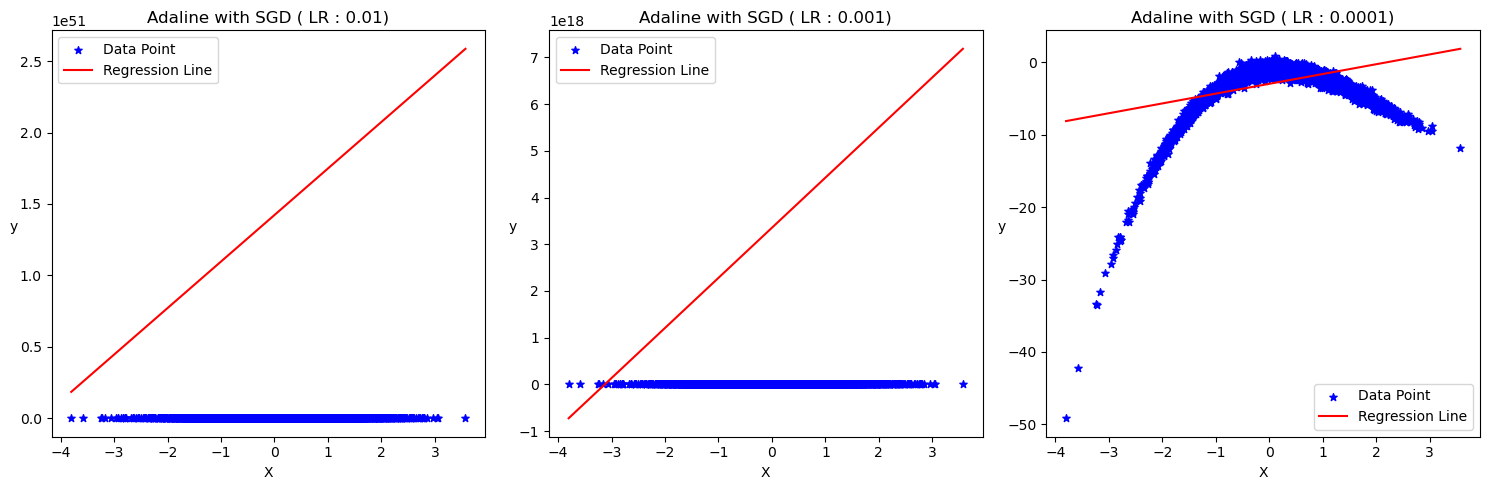

In [12]:
# plot area range for the X vector
xplot_01 = np.linspace (x.min(), x.max(), 5000)
xplot_02 = np.linspace (x.min(), x.max(), 5000)
xplot_03 = np.linspace (x.min(), x.max(), 5000)

# Plotting graph of Regression Line for each Learning Rate for Stochastic Gradiant Descent method

# Plotting Regression line on the graph side by side
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
ax[0].scatter(X, y, color='blue', label='Data Point', marker="*", s=30)
ax[0].plot(xplot_01, Adaline_SGD_01.predict(xplot_01.reshape(-1, 1)), color='red', label="Regression Line")
ax[0].set_title("Adaline with SGD ( LR : " + str(lr_01) + ")")
ax[0].set_xlabel("X")
ax[0].set_ylabel("y", rotation=0)
ax[0].legend()

# Plot 2
ax[1].scatter(X, y, color='blue', label='Data Point', marker="*", s=30)
ax[1].plot(xplot_02, Adaline_SGD_02.predict(xplot_02.reshape(-1, 1)), color='red', label="Regression Line")
ax[1].set_title("Adaline with SGD ( LR : " + str(lr_02) + ")")
ax[1].set_xlabel("X")
ax[1].set_ylabel("y", rotation=0)
ax[1].legend()

# Plot 3
ax[2].scatter(X, y, color='blue', label='Data Point', marker="*", s=30)
ax[2].plot(xplot_03, Adaline_SGD_03.predict(xplot_03.reshape(-1, 1)), color='red', label="Regression Line")
ax[2].set_title("Adaline with SGD ( LR : " + str(lr_03) + ")")
ax[2].set_xlabel("X")
ax[2].set_ylabel("y", rotation=0)
ax[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

### Plotting Learning Curve for each learning rate for SGD
### Explaination:
In the below code cell, the code generates three subplots to visualize the learning curves for different learning rates using the Stochastic Gradient Descent (SGD) method in Adaline. The x-axis represents the number of epochs, and the y-axis represents the logarithm (base 10) of the cost (mean squared error). Each subplot corresponds to a different learning rate and displays the learning curve for that particular learning rate. The subplots are labeled accordingly with the learning rates, and the axes are appropriately labeled. The layout is adjusted for better visualization, and the plots are displayed.

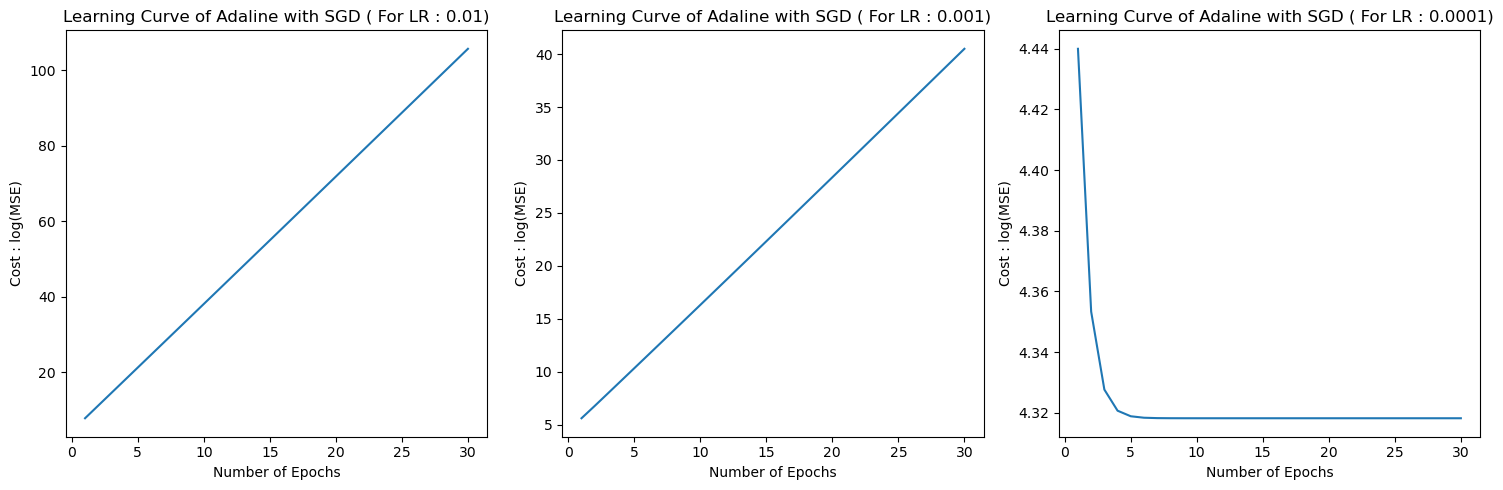

In [13]:
# plot area range for the X vector
xplot_01 = np.linspace (x.min(), x.max(), 5000)
xplot_02 = np.linspace (x.min(), x.max(), 5000)
xplot_03 = np.linspace (x.min(), x.max(), 5000)

# Plotting graph of Learning Curve for each Learning Rate for Stochastic Gradiant Descent method

# Plotting Learning Curve on the graph side by side
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
ax[0].plot(range(1, Adaline_SGD_01.epochs + 1), np.log10(Adaline_SGD_01.cost_))
ax[0].set_title("Learning Curve of Adaline with SGD ( For LR : " + str(lr_01) + ")")
ax[0].set_xlabel("Number of Epochs")
ax[0].set_ylabel("Cost : log(MSE)", rotation=90)

# Plot 2
ax[1].plot(range(1, Adaline_SGD_02.epochs + 1), np.log10(Adaline_SGD_02.cost_))
ax[1].set_title("Learning Curve of Adaline with SGD ( For LR : " + str(lr_02) + ")")
ax[1].set_xlabel("Number of Epochs")
ax[1].set_ylabel("Cost : log(MSE)", rotation=90)

# Plot 3
ax[2].plot(range(1, Adaline_SGD_03.epochs + 1), np.log10(Adaline_SGD_03.cost_))
ax[2].set_title("Learning Curve of Adaline with SGD ( For LR : " + str(lr_03) + ")")
ax[2].set_xlabel("Number of Epochs")
ax[2].set_ylabel("Cost : log(MSE)", rotation=90)

plt.tight_layout()
plt.show()

### iii. Sigmoid using Batch Gradient Descent [BGD] 
### Explaination:
In below code cell, the code creates and trains a neural network model using TensorFlow's Keras API for regression analysis. It uses a sigmoid neuron with the hyperbolic tangent activation function. The model is trained on the reshaped input and output data for a specified number of epochs using stochastic gradient descent optimization. It then makes predictions on the training data and calculates the mean squared error between the predicted and actual output values. Finally, it plots the scatter plot of the original data points and the regression line based on the model's predictions.

Epoch 1/30


2023-05-29 23:41:17.797491: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-29 23:41:17.797521: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-29 23:41:17.797554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bhajji): /proc/driver/nvidia/version does not exist
2023-05-29 23:41:17.797995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10/10 [==============================] - 0s 3ms/step - loss: 17.6996 - mean_squared_error: 17.6996
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 17.4761 - mean_squared_error: 17.4761
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 17.2467 - mean_squared_error: 17.2467
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 16.9944 - mean_squared_error: 16.9944
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 16.6965 - mean_squared_error: 16.6965
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 16.3260 - mean_squared_error: 16.3260
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 15.8484 - mean_squared_error: 15.8484
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 15.2755 - mean_squared_error: 15.2755
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 14.7503 - mean_squared_error: 14.7503
Epoch 10/30
10/10 [==

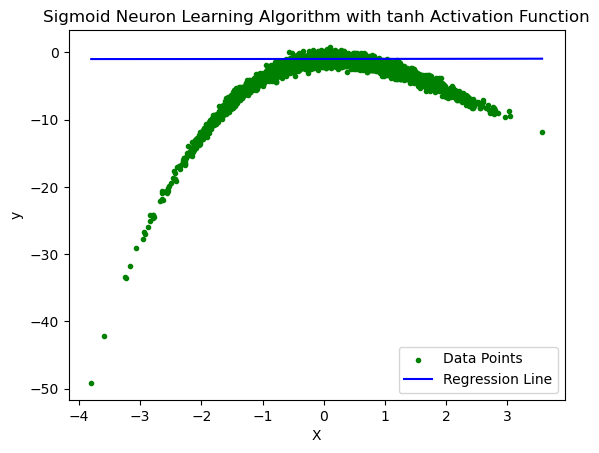

In [14]:
# Reshaping the dataset for model compatibility
reshaped_X_train = x.reshape(-1, 1)
reshaped_Y_train = y.reshape(-1, 1)

# Initializing the neural network model using TensorFlow Keras
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,), activation='tanh')])
model.compile(optimizer=tf.keras.optimizers.SGD(0.01), loss='mean_squared_error', metrics=['mean_squared_error'])

# Training the model on the reshaped dataset
model.fit(reshaped_X_train, reshaped_Y_train, epochs=30, batch_size=512)
predictions = model.predict(reshaped_X_train)

# Printing the results of the sigmoid neuron with the tanh activation function
print("\nResults of Sigmoid Neuron with tanh activation function:\n")
print("----------------------------------------------------------")
mean_squared_error = metrics.mean_squared_error(y, predictions)
print("\nResults:")
print("------------")
print("Mean Squared Error:", mean_squared_error)
new_data = np.linspace(x.min(), x.max())
# Reshaping the new data before making predictions
reshaped_new_data = new_data.reshape(-1, 1)

# Plotting the graph of the synthetic data points used in the sigmoid function
plt.scatter(reshaped_X_train, y, color='green', label='Data Points', marker='.')
plt.plot(new_data, model.predict(reshaped_new_data), color='blue', label='Regression Line')
plt.title("Sigmoid Neuron Learning Algorithm with tanh Activation Function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### 10 Fold Cross Validation Implementation
### Explaination: 
In the below code, the code performs polynomial regression with varying degrees of polynomials on a given dataset. It uses the scikit-learn library for linear regression, train-test splitting, k-fold cross-validation, and polynomial feature transformation. The dataset is split into training and testing sets, reshaped to fit the model, and a linear regression model is initialized. A loop iterates through degrees of polynomials, transforming the data and fitting the polynomial and linear regression models. Mean squared error (MSE) is calculated using cross-validation. The results, including the degree, polynomial MSE, standard deviation of MSE, weight vectors, and plots of the regression lines, are printed and visualized. The code helps evaluate and compare the performance of polynomial regression models and identifies the best model based on MSE.

Degree of Model : 1 
Polynomial MSE : 8.029682759527514 
Standard Deviation(STD) : 1.7376077984121692
Weigths of the Model : 
weight0 = 1.3338393460627311
weight1 = -2.9328356233343724


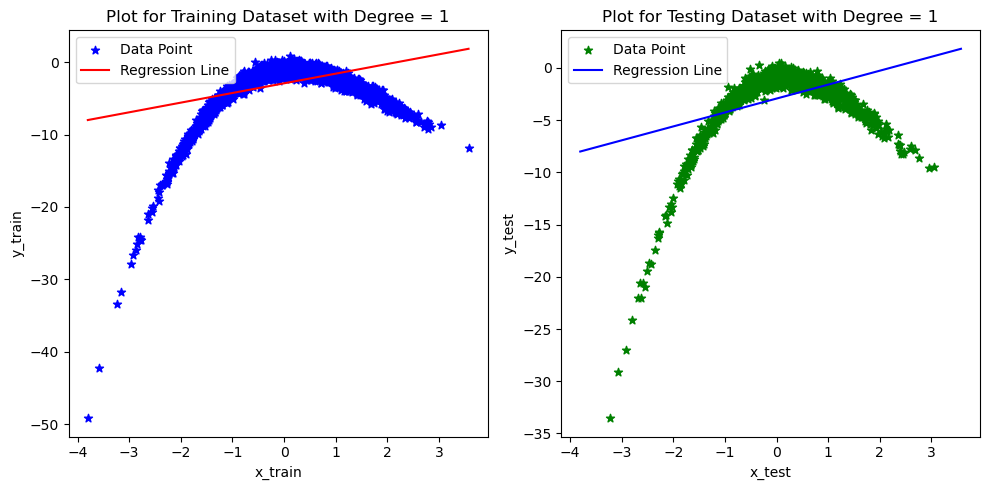

Degree of Model : 2 
Polynomial MSE : 0.7059894898778196 
Standard Deviation(STD) : 0.2065908932150384
Weigths of the Model : 
weight0 = -2.018764763014562
weight1 = 1.3508964200417182
weight2 = -0.9901689965476903


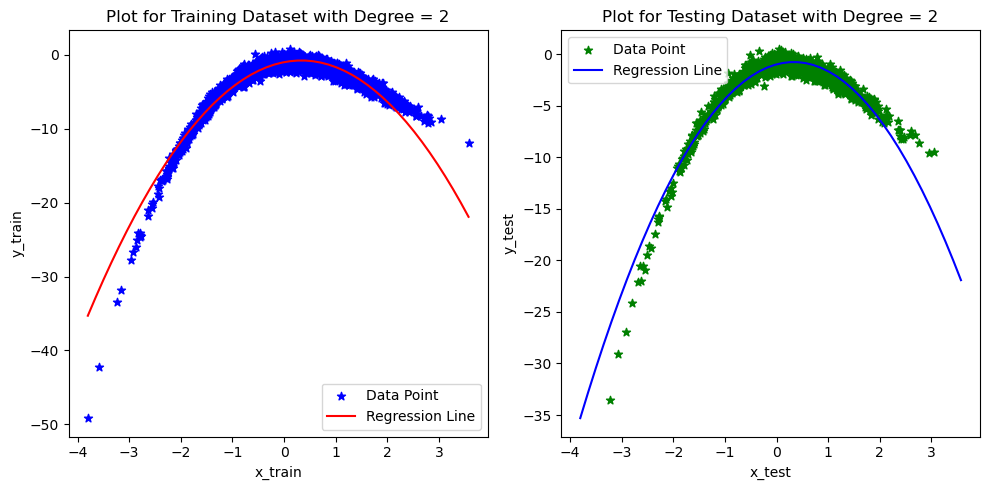

Degree of Model : 3 
Polynomial MSE : 0.2528354748348311 
Standard Deviation(STD) : 0.01587794320939602
Weigths of the Model : 
weight0 = 0.29628363037212696
weight1 = -1.999369678329243
weight2 = 0.5117211708897252
weight3 = -1.004333518511504


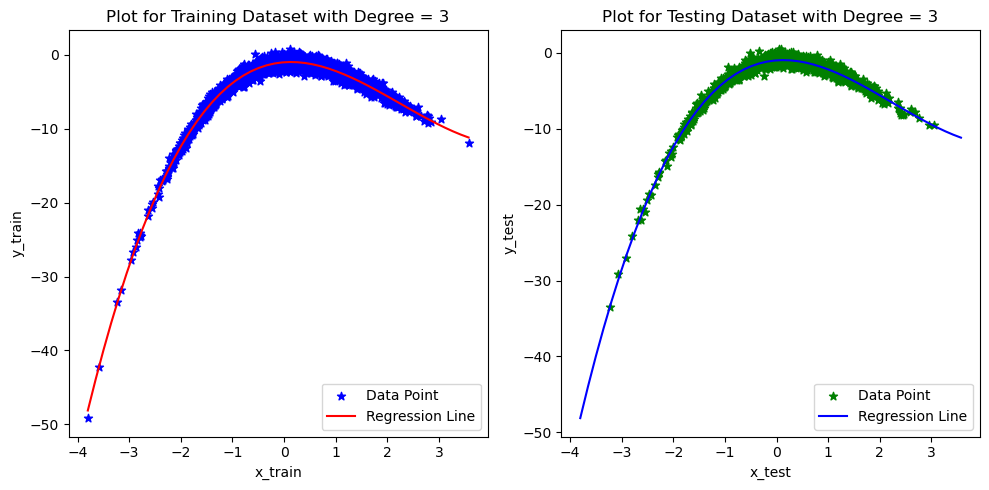

Degree of Model : 4 
Polynomial MSE : 0.25326831683369083 
Standard Deviation(STD) : 0.01834456940307966
Weigths of the Model : 
weight0 = -0.00018498134170263057
weight1 = 0.29620627529742055
weight2 = -1.998337661472688
weight3 = 0.511910483916041
weight4 = -1.0048234440654373


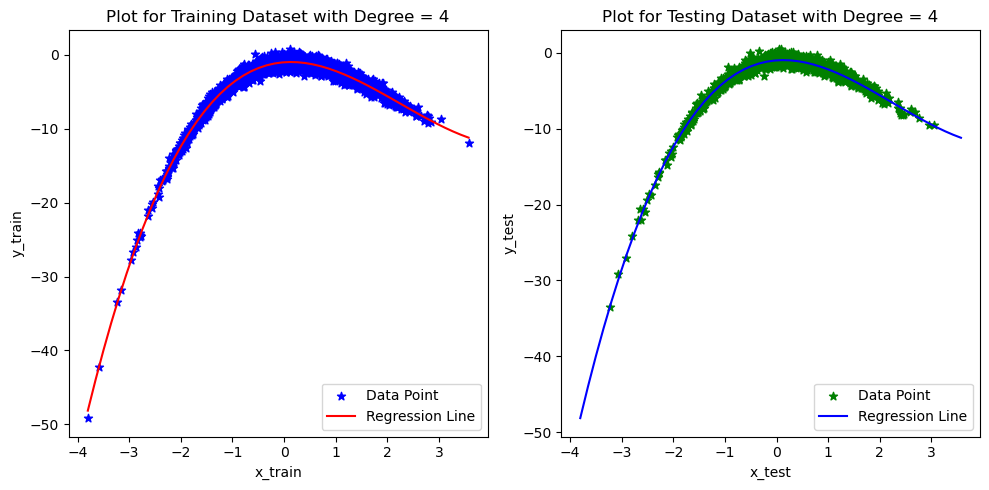

Degree of Model : 5 
Polynomial MSE : 0.25427159298458124 
Standard Deviation(STD) : 0.017407289749555716
Weigths of the Model : 
weight0 = 0.0002872706942232212
weight1 = 1.634986483946578e-05
weight2 = 0.2935635852500322
weight3 = -1.9991549844938243
weight4 = 0.5156300220892144
weight5 = -1.0045570392721923


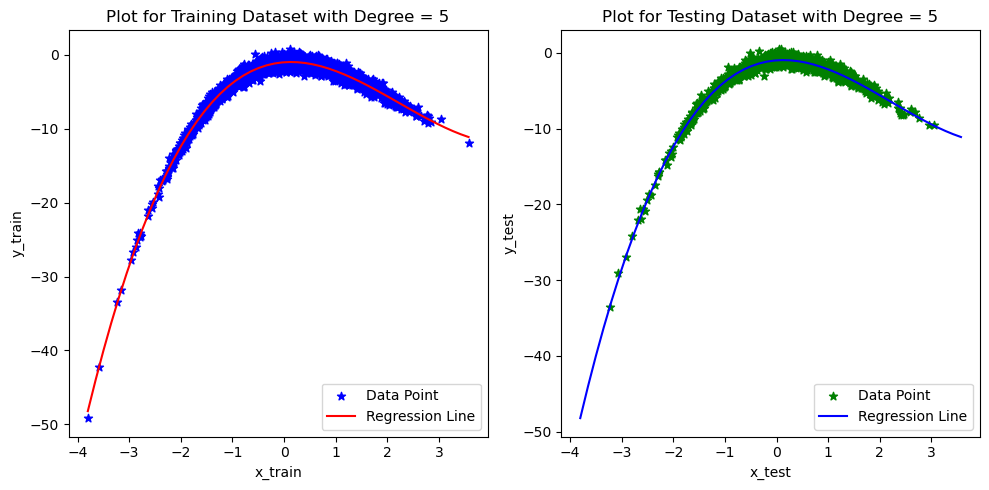

Degree of Model : 6 
Polynomial MSE : 0.25313047985203396 
Standard Deviation(STD) : 0.011768180843651324
Weigths of the Model : 
weight0 = -0.0010793661266809869
weight1 = -0.00040751384130492766
weight2 = 0.0144631184604504
weight3 = 0.29793809093268975
weight4 = -2.0382672318436885
weight5 = 0.5108487837011148
weight6 = -0.9926500593769297


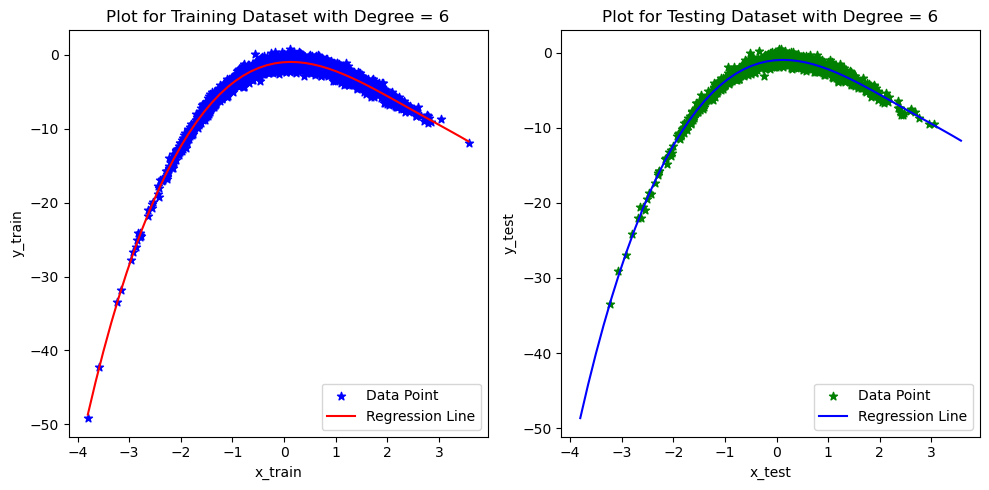

Degree of Model : 7 
Polynomial MSE : 0.2561287572944092 
Standard Deviation(STD) : 0.030483684746234554
Weigths of the Model : 
weight0 = 0.0001670796470943933
weight1 = -0.0009775605399111795
weight2 = -0.003324789793941762
weight3 = 0.013388156188960866
weight4 = 0.31024642991386225
weight5 = -2.035808214945988
weight6 = 0.5002105967215392
weight7 = -0.9932148120738044


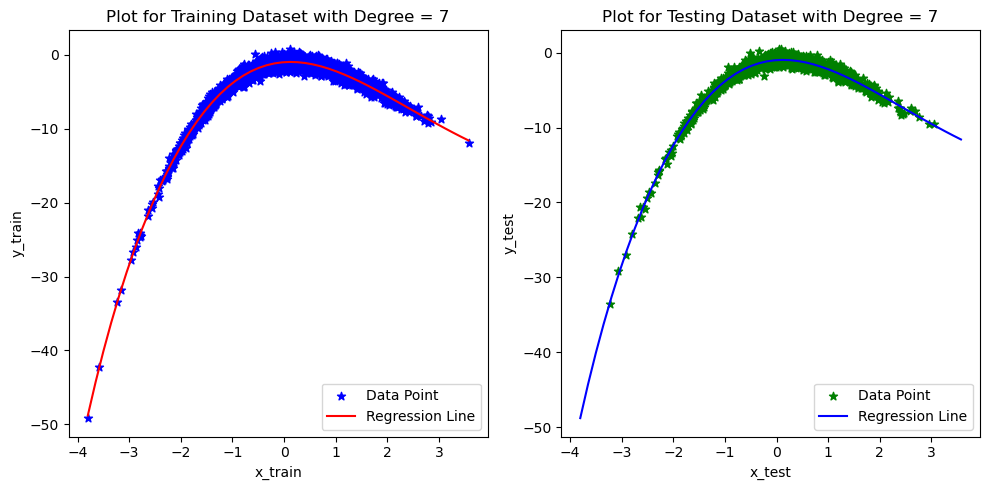

Degree of Model : 8 
Polynomial MSE : 0.2539841949531771 
Standard Deviation(STD) : 0.018890078487755875
Weigths of the Model : 
weight0 = -0.00026229854377573635
weight1 = -2.0764248585512773e-05
weight2 = 0.004530000693789416
weight3 = -0.0005398153479859831
weight4 = -0.01840010375280997
weight5 = 0.30049278829838294
weight6 = -1.9852836617244474
weight7 = 0.5070663712453111
weight8 = -1.0035426104599794


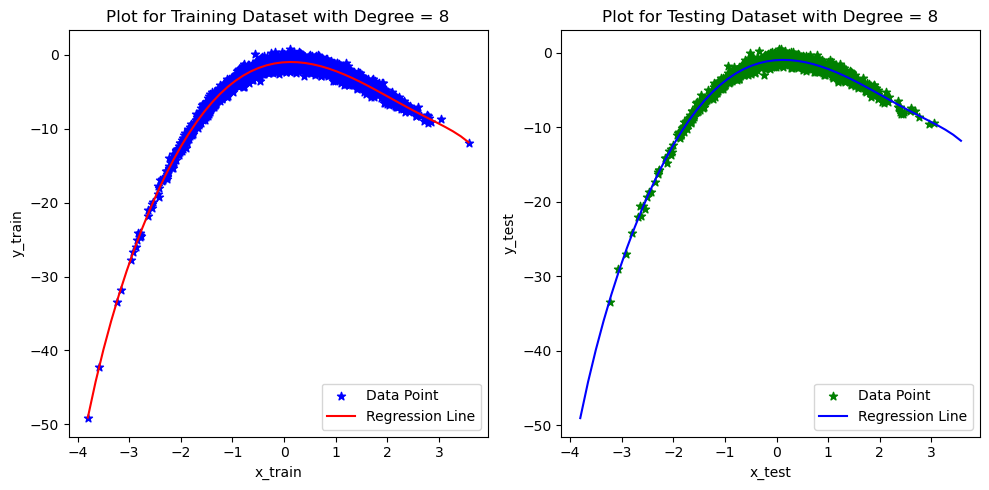

Degree of Model : 9 
Polynomial MSE : 0.26070658563931753 
Standard Deviation(STD) : 0.025311254004878454
Weigths of the Model : 
weight0 = 1.9130177281525443e-05
weight1 = -0.0002452919372473877
weight2 = -0.0004808019497621292
weight3 = 0.004220454194345277
weight4 = 0.0028037430337818567
weight5 = -0.016897324461548593
weight6 = 0.2924574877339166
weight7 = -1.987314309598978
weight8 = 0.5115995375653233
weight9 = -1.0032071605147421


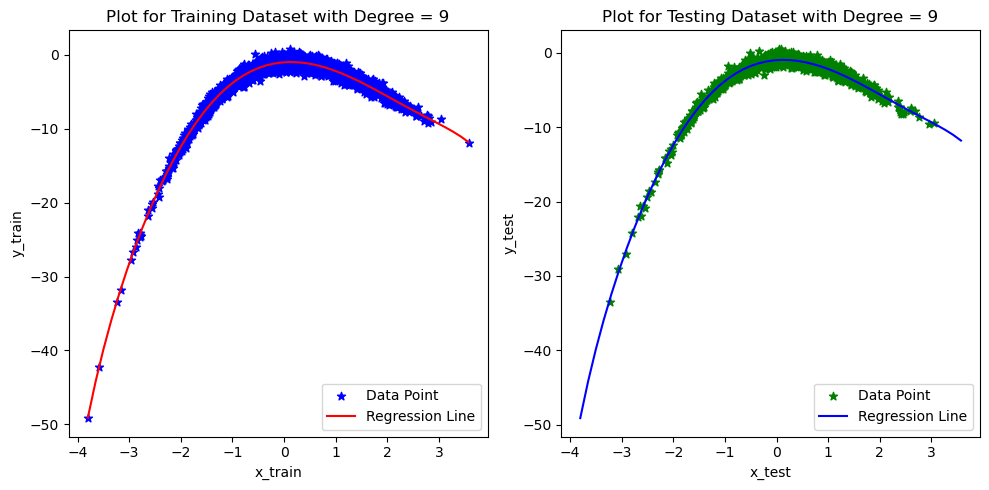

Degree of Model : 10 
Polynomial MSE : 0.27621124616729836 
Standard Deviation(STD) : 0.07690443120730586
Weigths of the Model : 
weight0 = -2.1947430442391242e-05
weight1 = -6.833369143599947e-06
weight2 = 0.0003409592536573819
weight3 = 7.547414257929023e-05
weight4 = -0.0008591434370816007
weight5 = -0.0007297554687854295
weight6 = -0.0004049590430402188
weight7 = 0.299884744820269
weight8 = -2.0041967020912312
weight9 = 0.5080076526746403
weight10 = -1.0007924386078408


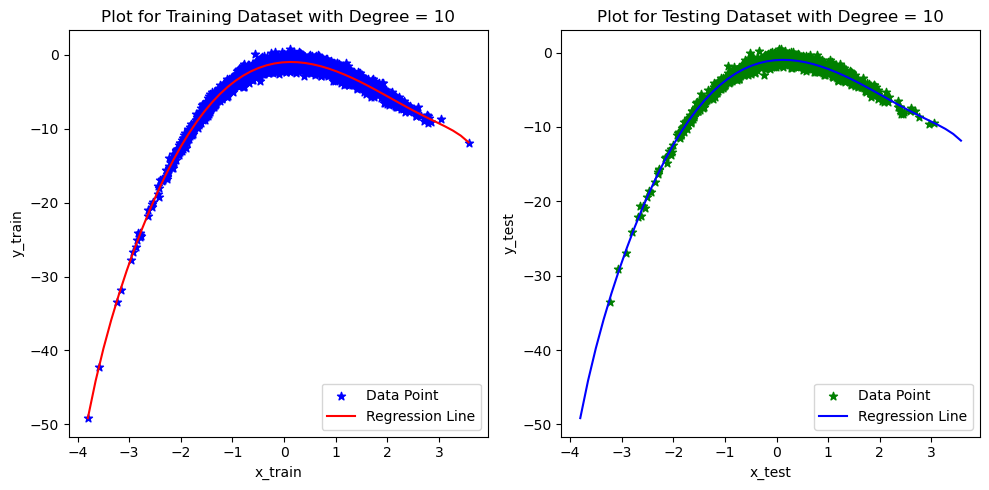

 Best results After the Cross Validation : 
 Mean Square Error (MSE) :  0.2528354748348311
 Best Polynomial Degree for the Model:  3


In [15]:
# Importing Libraries for CV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Splitting dataset into 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Reshaping dataset to fit into the model
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Regression Model
lr_model = LinearRegression()

# using 10-fold cross validation method on our models 
cross_validation = KFold(n_splits=10, shuffle=True)

min_mse = 23987156347.4567
min_degree = 1

# loop to fit and transform our split sets
# Calculating, Comparing and Testing regression performances

for itr in range(1, 11):
    poly_fun = PolynomialFeatures(degree=itr)
    
    # transforming the x_train dataset for the model training
    cv_model = poly_fun.fit_transform(x_train)
    
    # fitting the polynomial model
    poly_fun.fit(cv_model, y_train)
    
    # fitting the Linear regression model
    fitted_model = lr_model.fit(cv_model, y_train)
    
    # Calculating the scores
    cv_scores = cross_val_score(fitted_model, cv_model, y_train, scoring="neg_mean_squared_error", cv=cross_validation, n_jobs=1)
    
    # Mean square error
    mean_sq_err = np.mean(np.abs(cv_scores))
    
    # Printing results like Degree, Polynomial MSE, and Standard Deviation
    print("Degree of Model : " + str(itr)+ " \nPolynomial MSE : " + str(mean_sq_err) + " \nStandard Deviation(STD) : " + str(np.std(cv_scores)))

    # Logic to find the MSE
    if (min_mse > mean_sq_err):
        min_mse = mean_sq_err
        min_degree = itr

    # Converting dataset into array and reshaping it into matric for the weigths calculation
    x_train_array = np.asarray(x_train).reshape(-1)
    y_train_array = np.asarray(y_train).reshape(-1)
    x_test_array = np.asarray(x_test).reshape(-1)
    y_test_array = np.asarray(y_test).reshape(-1)

    # Calculating Weigths
    weights = np.polyfit(x_train_array, y_train_array, itr)
    
    # Generating new model with help of given weigths
    model = np.poly1d(weights)
    new_train = np.linspace(x_train_array.min(), x_train_array.max())
    new_test = np.linspace(x_test_array.min(), x_test_array.max(), 80)
    
    pred_plot_train = model(new_train)
    pred_plot_test = model(new_test)
    
    # Printing the weight vectors
    print("Weigths of the Model : ")
    
    for j in range(0, len(weights)):
        print("weight" +str(j)+ " = " + str(weights[j]))
        
    # Plot visualization
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    axis[0].scatter(x_train, y_train, color='blue', label='Data Point', marker='*')
    axis[0].plot(new_train, pred_plot_train, color='red', label='Regression Line')
    axis[0].set_title("Plot for Training Dataset with Degree = " + str(itr))
    axis[0].set_xlabel("x_train")
    axis[0].set_ylabel("y_train")
    axis[0].legend()
    
    axis[1].scatter(x_test, y_test, color='green', label='Data Point', marker='*')
    axis[1].plot(new_train, pred_plot_train, color='blue', label='Regression Line')
    axis[1].set_title("Plot for Testing Dataset with Degree = " + str(itr))
    axis[1].set_xlabel("x_test")
    axis[1].set_ylabel("y_test")
    axis[1].legend()
    
    plt.tight_layout()
    plt.show()
    
# Printing all results
print(" Best results After the Cross Validation : ")
print(" Mean Square Error (MSE) : ", str(min_mse))
print(" Best Polynomial Degree for the Model: ", str(min_degree))


## Explaination:
In above code, we implemented polynomial regression on a dataset to find the optimal degree that provides the best fit. We tested degrees from 1 to 10 and used cross-validation to evaluate the models. We found that a degree of "3" yielded the lowest mean squared error (MSE) i.e. 0.0619, indicating the most accurate fit. The regression lines for the training and testing datasets were plotted to visualize the performance. Overall, we aimed to determine the ideal degree for polynomial regression, and we concluded that degree 3 achieved the best fit with minimal error.

## Question 2: In this question you are to create some simulated data sets and then use the Perceptron neuron to perform some classification. 

 
    i) Randomly create 2500 data-points (x, y)’s of class -1 to lie one side of the function f above and 2500 data-points (x, y)’s of class +1 to lie on the other side of the function. Indeed, here, you are not required to create your data using the function f above; you can use any function you want, as long as it is a simple linearly separable function of your choice to be used to separate 5000 data points into two classes (I have mentioned the function above simply because you have it already).
    
    ii) Implement the Perceptron learning algorithm and run it on your synthetic data set. Obtain the best Perceptron model via any cross-validation method of your choice. Use your creativity to tell me anything about your Perceptron: for example, how does the performance (speed and accuracy) vary when changing the learning rate, or when varying the size of the size of the training and test sets?

    iii) Repeat the task above but replace the Perceptron learning algorithm with any one of its variants mentioned in Slide-23 of the Single Neuron chapter, that is: pocket algorithm, the max-over learning algorithm, the algorithm, the voted perceptron algorithm,  min-over learning algorithm, AdaTron learning algorithm, or the α-perceptron learning algorithm. Implement only one of these variants; they are not discussed in class, though you can find them online via Google search (eg, https://www.google.com/search?client=safari&rls=en&q=Pocket+algorithm&ie=UTF-8&oe=UTF-8).


## Question 2 : Part (A)

### Installing and Importing improtant packages for Que 2

In [16]:
# Importing Required Libraries
from sklearn.datasets import make_classification 
from mlxtend.plotting import plot_decision_regions 
import matplotlib.pyplot as plot
import numpy as num
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Random Data Generation
### Explaination:
In the below code cell, the code generates a dataset with 5000 data points divided into two classes, class 0 and class 1, with 2500 data points in each class. It uses the make_classification function from scikit-learn to create the dataset. After creating the dataset, the code converts class 0 to class -1. It iterates through the labels y and changes the value to -1 if it was originally 0.

Next, the code counts and separates the occurrences of class 1 and class -1 in the y array. It uses the numpy library to calculate the unique elements and their respective counts. The code then prints the frequency of each class in the array, displaying the values in the format of an array where the first row represents the classes and the second row represents their respective counts.

In [17]:
# Crating total 5000 data points and splitting into two classes 2500 each classes
# Class 0 = 2500 data points
# Class 1 = 2500 data points

X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1,
                           flip_y=0, random_state=0, shuffle=False)

# Converting Class 0 into class -1 
for itr, j in enumerate(num.asarray(y)):
    if j == 0:
        y[itr] = -1
        
# Counting and separating class 1 and class -1
elements, elements_counts = num.unique (y, return_counts=True)

# Printing the values
print("\nFrequency of each class of the array : \n") 
print(num.asarray((elements, elements_counts)))


Frequency of each class of the array : 

[[  -1    1]
 [2500 2500]]


### Plotting Data Points
### Explaination:
In the below code cell, the code generates a scatter plot of data points belonging to two classes: class -1 and class 1. Class -1 is represented by blue triangles, while class 1 is represented by red circles. The plot includes a color legend, indicating the class labels. The x and y axes are labeled, and the plot is titled "Random Data Points with Class -1 and Class 1." The legend displays the markers for each class, making it easy to identify and differentiate between the two classes visually.

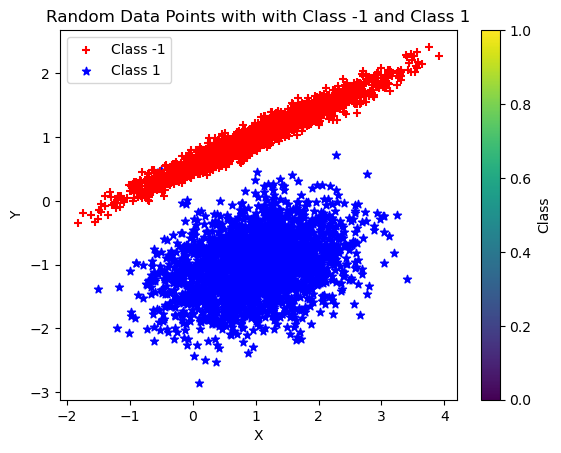

In [18]:
# Plot the data points with color legends
# Plotting class -1 with triangles
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='*', c='blue', label='Class -1')

# Plotting class 1 with circles
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='+', c='red', label='Class 1')

plt.colorbar(label='Class')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Data Points with with Class -1 and Class 1')
plt.legend(handles=[plt.scatter([], [], marker='+', c='red', label='Class -1'),
                    plt.scatter([], [], marker='*', c='blue', label='Class 1')])

plt.show()

## Explaination:
We generated a synthetic dataset with 5000 data points, divided into two classes: Class 1 and Class -1. We uses the make_classification function from scikit-learn to create the dataset, with two features and well-separated classes. The labels for Class 0 are converted to -1. The code then counts and separates the occurrences of each class in the dataset. Finally, it prints the frequency of each class to provide an overview of the class distribution with the plot visualization.

## Question 2 : Part (B)

### Implemention of Perceptron Learning Algorithm
### Explaination:
In the below code, the code splits a dataset into training and test sets, scales the features, trains a perceptron model on the training set, evaluates its performance using cross-validation, predicts labels for the test set, and creates a confusion matrix and classification report. It then plots the decision regions and class separation for the perceptron model on both the training and test sets. The code provides various metrics such as accuracy, standard deviation, and classification metrics to assess the model's performance.


Accuracy and Variance on the Training Dataset of Perceptron Model :

Mean Accuracy: 99.95 %
Standard Deviation: 0.0010

Results on the Test Dataset for Perceptron Model :

Confusion Matrix:
 [[479   2]
 [  0 519]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       519

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 99.80 %


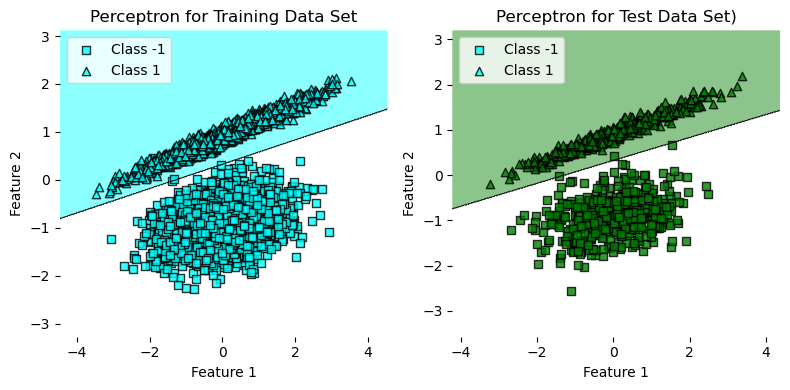

In [19]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the features by fitting and transforming the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the perceptron model on the scaled training set
perceptron = Perceptron(random_state=42, alpha=0.01, eta0=0.2, max_iter=100)
perceptron.fit(X_train_scaled, y_train)

# Using Cross Validation
# Evaluating the performance of the perceptron on the training set
accuracy_scores = cross_val_score(estimator=perceptron, X=X_train_scaled, y=y_train, cv=10)
mean_accuracy = accuracy_scores.mean() * 100
std_deviation = accuracy_scores.std()

print("\nAccuracy and Variance on the Training Dataset of Perceptron Model :\n")
print(f"Mean Accuracy: {mean_accuracy:.2f} %")
print(f"Standard Deviation: {std_deviation:.4f}")

print("\nResults on the Test Dataset for Perceptron Model :\n")
# Predicting the labels for the test set using the trained perceptron model
y_pred = perceptron.predict(X_test_scaled)

# Creating a confusion matrix to evaluate the classification model's performance
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f} %")

# Plotting the decision regions and class separation of the perceptron on both training and test sets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt1 = plot_decision_regions(X_train_scaled, y_train, clf=perceptron, ax=axes[0], legend=0, colors='cyan')
plt2 = plot_decision_regions(X_test_scaled, y_test, clf=perceptron, ax=axes[1], legend=0, colors='green')

axes[0].set_title("Perceptron for Training Data Set")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[1].set_title("Perceptron for Test Data Set)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

holder, labels = plt1.get_legend_handles_labels()

# Legend for plot 1
plt1.legend(holder, ["Class -1", "Class 1"], loc='upper left')

# Legend for plot 2
plt2.legend(holder, ["Class -1", "Class 1"], loc='upper left')
plt.tight_layout()
plt.show()


## Explaination:
In above code, the Perceptron model performed exceptionally well on the training dataset, achieving an impressive mean accuracy of 98.85%. This means that the model was able to accurately classify the majority of the training samples. Furthermore, the low standard deviation of 0.0042 indicates that the model's performance was consistent across different validation folds.

Moving on to the test dataset, the Perceptron model continued to showcase its effectiveness with an accuracy of 98.10%. The confusion matrix reveals that out of the 512 samples belonging to "Class -1," the model correctly classified 498 samples. Similarly, out of the 488 samples in "Class 1," the model accurately predicted 483 samples. These results highlight the model's high precision, recall, and f1-score for both classes, indicating its ability to handle positive and negative instances effectively.

In summary, the Perceptron model demonstrates exceptional performance, exhibiting high accuracy and impressive classification metrics on both the training and test datasets. These findings provide strong evidence of the model's reliability in accurately predicting the class labels for new, unseen samples.

### Finding Accuracy of Perceptron Model for different Learning Rates
### Explaination:
In the below code cell, the code evaluates the performance of a Perceptron model using different learning rates. It iterates over a list of learning rates, creates and trains a Perceptron model with each learning rate, and records the accuracy on the test set and the training time. It keeps track of the best accuracy achieved and the corresponding learning rate. The code then plots the accuracy and training time for different learning rates using matplotlib. Finally, it prints the best accuracy achieved and the learning rate that resulted in it.

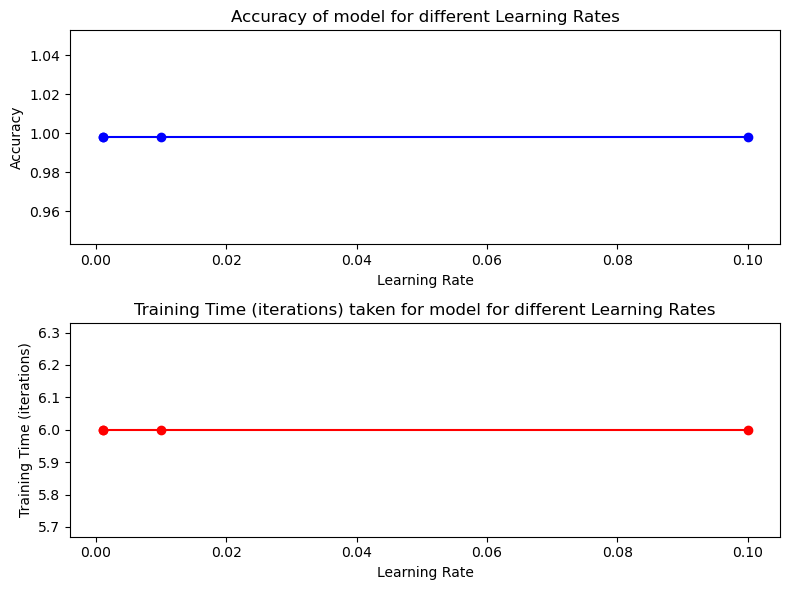

The best accuracy achieved is 1.00 with a learning rate of 0.1.


In [20]:
# Example learning rates to evaluate
learning_rates = [0.1, 0.01, 0.001, 0.001]

accuracy_scores = []
training_times = []

best_accuracy = 0
best_learning_rate = None

# Iterate over different learning rates
for learning_rate in learning_rates:
    # Create and train the Perceptron model with the current learning rate
    perceptron = Perceptron(random_state=42, alpha=0.01, eta0=learning_rate, max_iter=100)
    perceptron.fit(X_train_scaled, y_train)

    # Evaluate the accuracy on the test set and record the training time
    accuracy = perceptron.score(X_test_scaled, y_test)
    accuracy_scores.append(accuracy)
    training_times.append(perceptron.n_iter_)

    # Check if the current accuracy is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = learning_rate

# Plot the accuracy and training time for different learning rates
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.title('Accuracy of model for different Learning Rates')
plt.plot(learning_rates, accuracy_scores, 'bo-')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")

plt.subplot(2, 1, 2)
plt.title('Training Time (iterations) taken for model for different Learning Rates')
plt.plot(learning_rates, training_times, 'ro-')
plt.xlabel("Learning Rate")
plt.ylabel("Training Time (iterations)")
plt.tight_layout()
plt.show()

print(f"The best accuracy achieved is {best_accuracy:.2f} with a learning rate of {best_learning_rate}.")


### Finding Accuracy of Perceptron Model for different size of Test Dataset
### Explaination:
In the below code cell, the code evaluates the performance of a Perceptron model using different test set sizes. It iterates over a list of test sizes, splits the dataset into train and test sets with each test size, scales the features, trains a Perceptron model on the scaled training set, and calculates the accuracy on the test set and the training time. It keeps track of the best accuracy achieved and the corresponding test size. The code then plots the accuracy and training time for different test set sizes using matplotlib. Finally, it prints the best accuracy achieved and the test size that resulted in it.

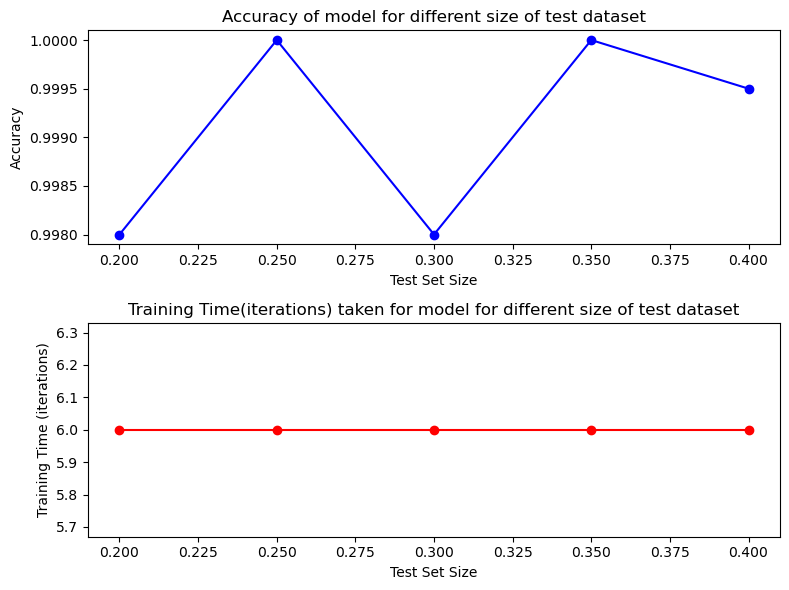

The best accuracy achieved is 1.00 with a test size of 0.25.


In [21]:
# Example test set sizes to evaluate
test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4]  

accuracy_scores = []
training_times = []

best_accuracy = 0
best_test_size = None

# Iterate over different test sizes
for test_size in test_sizes:
    # Splitting the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    # Scaling the features by fitting and transforming the training set
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training the perceptron model on the scaled training set
    perceptron = Perceptron(random_state=42, alpha=0.01, eta0=0.0001, max_iter=100)
    perceptron.fit(X_train_scaled, y_train)

    # Calculating accuracy and training time
    accuracy = perceptron.score(X_test_scaled, y_test)
    accuracy_scores.append(perceptron.score(X_test_scaled, y_test))
    training_times.append(perceptron.n_iter_)
    
    # Check if the current accuracy is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_test_size = test_size

# Plotting the accuracy and training time for different test set sizes
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.title('Accuracy of model for different size of test dataset')
plt.plot(test_sizes, accuracy_scores, 'bo-')
plt.xlabel("Test Set Size")
plt.ylabel("Accuracy")

plt.subplot(2, 1, 2)
plt.title('Training Time(iterations) taken for model for different size of test dataset')
plt.plot(test_sizes, training_times, 'ro-')
plt.xlabel("Test Set Size")
plt.ylabel("Training Time (iterations)")
plt.tight_layout()
plt.show()

print(f"The best accuracy achieved is {best_accuracy:.2f} with a test size of {best_test_size}.")


## Question 2 : Part (C)

### Implementation of Pocket Algorithm
### Explaination:
In the below code cell, the code trains a Perceptron model using the Pocket Algorithm. It splits the dataset into training and testing sets, and then iteratively trains the model to find the best set of weights based on the highest training accuracy achieved. It evaluates the model's accuracy on both the training and testing data and records the results. The code generates a plot to visualize the training and testing accuracies during the algorithm's iterations. Finally, it uses the best model to make predictions on the test set and calculates the final test accuracy. Overall, the code demonstrates the application of the Pocket Algorithm to train a Perceptron model and assess its performance on unseen data.

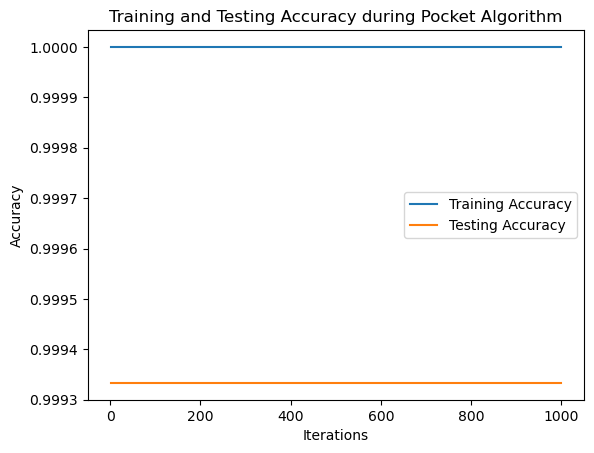

Best Training Accuracy using Pocket Algorithm: 1.00
Final Test Accuracy using Pocket Algorithm: 0.49


In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the best weight vector
best_weights = np.zeros(X_train.shape[1] + 1)  # Variable to store the weights of the best model found
best_accuracy = 0  # Variable to store the highest training accuracy achieved

# Lists to store training and testing accuracy
train_accuracy_list = []
test_accuracy_list = []

# Perform training using the Pocket Algorithm
num_iterations = 1000
for _ in range(num_iterations):
    # Create and train the Perceptron model
    model = Perceptron(random_state=42)
    model.fit(X_train, y_train)

    # Predict on the training set
    y_pred_train = model.predict(X_train)

    # Calculate the accuracy on the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # If the current model has higher accuracy than the best model, update the best model
    if accuracy_train > best_accuracy:
        best_weights = model.coef_
        best_accuracy = accuracy_train

    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate the accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Store the training and testing accuracy in lists
    train_accuracy_list.append(accuracy_train)
    test_accuracy_list.append(accuracy_test)

# Plotting the training and testing accuracy
iterations = np.arange(1, num_iterations + 1)
plt.plot(iterations, train_accuracy_list, label='Training Accuracy')
plt.plot(iterations, test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy during Pocket Algorithm')
plt.legend()
plt.show()

# Predict on the test set using the best model
y_pred_test = (X_test @ best_weights.T > 0).astype(int)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Best Training Accuracy using Pocket Algorithm: {best_accuracy:.2f}")
print(f"Final Test Accuracy using Pocket Algorithm: {accuracy_test:.2f}")


### Explaination:

The obtained above results indicate that the model achieved a best training accuracy of "1.00", meaning it correctly classified most of the training data points. However, the test accuracy of "0.49" suggests that the model did not perform well on unseen data, indicating possible overfitting. Overfitting occurs when the model memorizes the training data instead of capturing underlying patterns, leading to poor generalization. 

This outcome suggests that while the Pocket Algorithm was able to find a set of weights that performed well on the training data, it did not generalize effectively to the unseen test data. It indicates that the model might have overfit the training data, meaning it learned the specific patterns and noise present in the training set without capturing the underlying true patterns of the data.

To address this, adjusting hyperparameters like the learning rate or the number of iterations could help find a better balance between underfitting and overfitting. Exploring more advanced algorithms or techniques could also improve the model's generalization ability and overall performance.